In [1]:
import pandas as pd

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
from create_df import read_df
df, dfc, all_homes, appliance_min, national_average = read_df()

In [3]:
run all_functions.py


In [4]:
run features.py

In [27]:
from itertools import combinations
out = {}
for appliance in ["wm","dw","hvac","fridge","light","dr"]:
    out[appliance] = {}
    for home in all_homes[appliance]:
        out[appliance][home] = {"best_prediction_array":{}, "best_score":1e7, "optimal_subset":{}}






appliance_columns = {'fridge':["fridge_%d" % i for i in range(1, 13)],
                     'hvac':["hvac_%d" % i for i in range(1, 13)],
                     "light":["light_%d" % i for i in range(1, 13)],
                     "dw":["dw_%d" % i for i in range(1, 13)],
                     "wm":["wm_%d" % i for i in range(1, 13)],
                     "dr":["dr_%d" % i for i in range(1, 13)]}

errors_dict = {}
for appliance in appliance_columns.keys():
    print appliance
    errors_dict[appliance] = {}
    for max_length in range(1, 3):
        errors_dict[appliance][max_length] = {}
        all_combinations = combinations(all_homes[appliance], max_length)
        for train_homes in all_combinations:

            test_homes = np.setdiff1d(all_homes[appliance],train_homes)
            for home in test_homes:
                pred_home = np.mean(df.ix[list(train_homes)][appliance_columns[appliance]])
                gt_home = df.ix[home][appliance_columns[appliance]]
                if appliance is "hvac":
                    error = np.mean(100*(gt_home-pred_home).abs().div(gt_home)[4:9])
                else:
                    error = np.mean(100*(gt_home-pred_home).abs().div(gt_home))
                if error<out[appliance][home]['best_score']:
                    if appliance is "hvac":
                        errors_dict[appliance][max_length][home] = 100*(gt_home-pred_home).abs().div(gt_home)[4:9]
                    else:
                        errors_dict[appliance][max_length][home] = 100*(gt_home-pred_home).abs().div(gt_home)
                    out[appliance][home]['best_score'] = error
                    out[appliance][home]['optimal_subset'] = train_homes
                    out[appliance][home]['best_prediction_array'] = pred_home

#pd.DataFrame(errors_dict).median(axis=1).mean()


hvac
light
wm
fridge
dw
dr


In [30]:
(100-pd.Series({f:pd.DataFrame(errors_dict[f][2]).mean().mean() for f in appliance_columns.keys()})).to_dict()

{'dr': 64.885914164535222,
 'dw': 61.017474093337341,
 'fridge': 91.888765437104055,
 'hvac': 93.195959529260662,
 'light': 77.810755698772141,
 'wm': 80.183453230991176}

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

In [37]:
appliance_name_mapping = {"dr": "Dryer", "wm": "Washing\nmachine",
                          "fridge":"Fridge","light":"Lights",
                          "hvac":"HVAC","dw":"Dish\nwasher"}

In [41]:
sen = pd.DataFrame(out)

In [43]:
sen = sen.rename(columns=appliance_name_mapping).T

In [44]:
sen

,All,Monthly,Monthly+Static,Static
Dryer,41.500556,39.344495,41.720212,38.444273
Dish\nwasher,46.288463,42.587760,42.077928,38.623122
Fridge,81.597182,77.740660,78.442603,75.182587
HVAC,79.283312,79.208159,79.208159,71.783518
Lights,53.255072,47.066094,49.605087,48.235812
Washing\nmachine,66.398906,64.363110,64.504250,60.045676


In [45]:
from common_functions import latexify, format_axes
latexify()

tableau20blind =  [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
  
# Rescale to values between 0 and 1
for i in range(len(tableau20blind)):  
    r, g, b = tableau20blind[i]  
    tableau20blind[i] = (r / 255., g / 255., b / 255.)

/Users/nipunbatra/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/nipunbatra/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

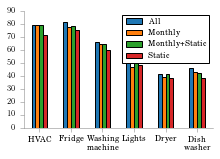

In [54]:
sen.ix[['HVAC','Fridge','Washing\nmachine',
                                    'Lights','Dryer','Dish\nwasher']].plot(kind="bar",rot=0, colors=tableau20blind[::2])
format_axes(plt.gca())